In [1]:
import pandas as pd
from pandas_ods_reader import read_ods
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sheetidx = 1
path = "/home/iamchiranjeeb/Desktop/amita/heart_disease_dataset.ods"
df = read_ods(path,sheetidx)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0


# Analysing The Data

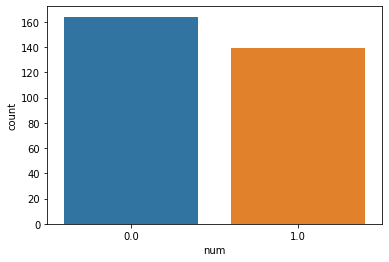

In [2]:
sns.countplot(x="num",data=df)

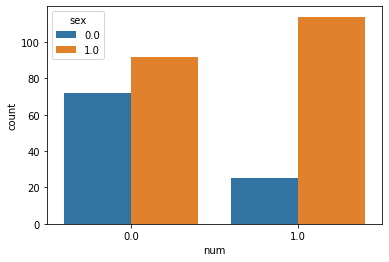

In [3]:
sns.countplot(x='num',hue='sex',data=df)

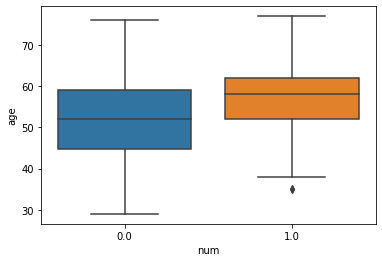

In [5]:
sns.boxplot(x='num',y='age',data=df)

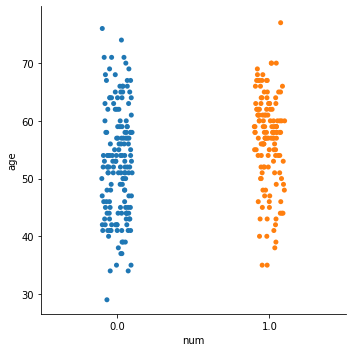

In [10]:
sns.catplot(x='num',y='age',data=df)

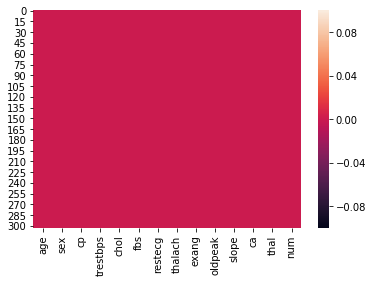

In [18]:
sns.heatmap(df.isnull())

In [19]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

# Training & Testing The Data

In [22]:
X = df.drop(['num'],axis=1)
y = df['num']


In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
model = LogisticRegression(solver='lbfgs')

In [27]:
model.fit(X_train,y_train)

/home/iamchiranjeeb/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
yp = model.predict(X_test)

In [29]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [30]:
accuracy_score(y_test,yp)

0.7049180327868853

In [33]:
yp

array([0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 1., 0., 0., 0., 1., 0., 0., 1., 0.])

In [34]:
y_test.values

array([0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1.,
       0., 0., 0., 1., 0., 1., 0., 0., 1., 0.])

In [35]:
cm = confusion_matrix(y_test,yp)

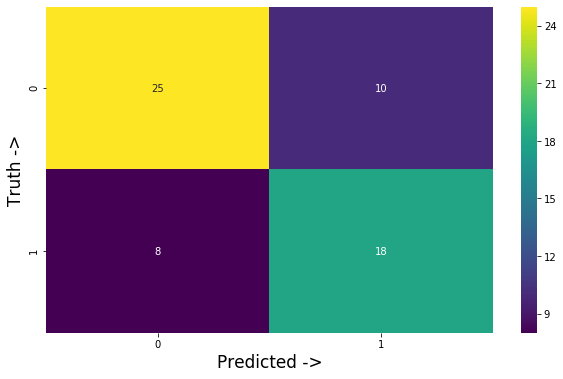

In [38]:
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,cmap='viridis')
plt.xlabel("Predicted ->",fontsize=17)
plt.ylabel("Truth ->",fontsize=17)
plt.show()